In [23]:
import h2o
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# h2o.init()

In [24]:
import pandas as pd
train = pd.read_csv('train.csv')
attributes = pd.read_csv('product_attributes.csv')

In [13]:
train.head(3)

,UserId,productid,Quantity,OrderDate
0,18075,12322648,1,01/04/18
1,6820,12371370,1,01/04/18
2,6820,12973004,1,01/04/18


In [3]:
attributes.head(3)

,productid,attribute_name,attributevalue
0,11145600,Fit,37
1,11145600,Sleeve Length,23
2,11145600,Fabric,16


In [154]:
len(attributes['productid'].unique())

3015

In [ ]:
val = train['UserId'].value_counts()
val

In [32]:
train = train[train.UserId != 26784]

In [33]:
train2 = train.copy()

In [34]:
g1 = train2.groupby(['UserId', 'productid'], as_index=False, sort=False).count()
g1.drop(['OrderDate'], axis=1, inplace=True)
g1

,UserId,productid,Quantity
0,18075,12322648,2
1,6820,12371370,1
2,6820,12973004,1
3,6820,12657560,1
4,6820,11659914,1
5,16920,11659532,1
6,25510,11659666,1
7,2364,11659826,3
8,18167,12360458,1
9,25740,11407272,2


In [35]:
from collections import defaultdict
dat = defaultdict(list)
data = g1.values
for i in range(data.shape[0]):
    dat[str(data[i, 0])].append(data[i, 1])

In [36]:
out = pd.DataFrame.from_dict(dat, orient='index')

In [37]:
out

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
18075,12322648,12658444.0,12658492.0,12658364.0,12658272.0,12407738.0,12658394.0,12658304.0,11659810.0,13067870.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6820,12371370,12973004.0,12657560.0,11659914.0,12658488.0,11659834.0,12407006.0,12406888.0,13039102.0,13039508.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16920,11659532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25510,11659666,12322658.0,12658430.0,12658428.0,11659562.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2364,11659826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18167,12360458,12406882.0,12407622.0,11659820.0,11659854.0,11659958.0,11714570.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25740,11407272,12658034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27659,12658150,12657614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16605,12658510,12406986.0,12657638.0,12657642.0,12657644.0,12658186.0,12396550.0,12407198.0,13038962.0,13039876.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4312,11360858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
out.to_csv('CustomerAnalytics.csv', index=True)
# plt.bar(list(out.loc['6820']), 10)

In [5]:
import imp
import pandas as pd
import h2o
h2o.init()
from h2o.estimators.kmeans import H2OKMeansEstimator
inp_data = pd.read_csv('data.csv')
ids = inp_data.drop(['productid'], axis=1)
hf = h2o.H2OFrame(inp_data)

█████████████████████████████████████████████████████████| 100%


In [12]:
results = [H2OKMeansEstimator(k=clusters, nfolds=4, init="Random", seed=2, standardize=True) for clusters in range(35,39)]
for estimator in results:
    estimator.train(x=hf.columns, training_frame = hf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [7]:
import math as math
def diagnostics_from_clusteringmodel(model):
    total_within_sumofsquares = model.tot_withinss()
    number_of_clusters = len(model.centers())
    number_of_dimensions = len(model.centers()[0])
    number_of_rows = sum(model.size())
    
    aic = total_within_sumofsquares + 2 * number_of_dimensions * number_of_clusters
    bic = total_within_sumofsquares + math.log(number_of_rows) * number_of_dimensions * number_of_clusters
    
    return {'Clusters':number_of_clusters,
            'Total Within SS':total_within_sumofsquares, 
            'AIC':aic, 
            'BIC':bic}

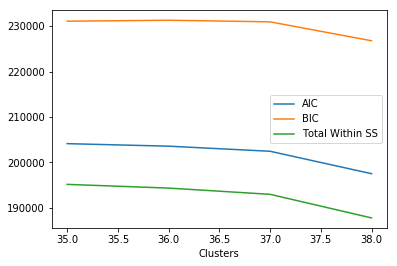

In [13]:
diagnostics = pd.DataFrame( [diagnostics_from_clusteringmodel(model) for model in results])
diagnostics.set_index('Clusters', inplace=True)
diagnostics.plot(kind='line')

In [16]:
clusters = 3
predicted = results[clusters].predict(hf)
hf["Predicted"] = predicted["predict"].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [17]:
data_out = hf.as_data_frame()
pd.concat([data_out, ids], axis=1, sort=False)
data_out

,productid,Category,Collection,Color,Fabric,Fit,Neckline,Season,Sleeve Length,1,...,120,121,122,123,124,125,126,127,128,Predicted
0,11139192,1,0,41,2,0,4,42,3,0.000000,...,0.000000,0.218640,0.000000,0.325955,0.000000,0.074799,0.285946,0.0,0.000000,36
1,11139194,1,0,25,2,0,4,42,3,0.000000,...,0.000000,0.000000,0.000000,0.987231,2.197785,0.000000,0.000000,0.0,0.000000,17
2,11139524,1,0,95,16,14,4,42,23,0.000000,...,0.000000,0.000000,0.022514,0.317667,0.000000,0.000000,0.000000,0.0,0.000000,36
3,11139560,1,0,41,2,14,4,42,127,0.000000,...,0.000000,0.400749,0.000000,0.091941,0.031504,0.000000,0.000000,0.0,0.000000,23
4,11139588,1,0,25,58,0,4,42,3,0.000000,...,0.000000,0.000000,0.490026,0.000000,0.590376,0.000000,0.000000,0.0,0.026321,36
5,11139650,1,0,31,2,14,4,42,23,0.000000,...,0.000000,0.000000,0.000000,0.151952,0.000000,0.000000,0.000000,0.0,0.000000,36
6,11141306,1,0,28,2,0,4,56,3,0.000000,...,0.000000,0.000000,0.420860,0.000000,0.615729,0.000000,0.000000,0.0,0.000000,18
7,11141308,1,0,71,2,0,4,56,3,0.000000,...,0.000000,0.000000,0.196929,0.509711,0.327669,0.000000,0.000000,0.0,0.000000,36
8,11141318,1,0,149,2,0,4,56,3,0.000000,...,0.000000,0.000000,0.384988,0.711221,1.495066,0.000000,0.000000,0.0,0.000000,30
9,11141320,1,0,149,2,0,4,56,3,0.000000,...,0.000000,0.000000,1.207749,0.388432,0.820009,0.000000,0.000000,0.0,0.000000,30


In [18]:

data_out.to_csv('Clustered_Data.csv', index=False)

In [42]:
clu = defaultdict(list)
data = data_out.values
for i in range(data.shape[0]):
    clu[str(data[i, data.shape[1]-1])].append(data[i, 0])

cluster_out = pd.DataFrame.from_dict(clu, orient='index')

In [43]:
cluster_out

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
36.0,11139192.0,11139524.0,11139588.0,11139650.0,11141308.0,11141330.0,11141530.0,11141538.0,11144136.0,11144260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17.0,11139194.0,11659112.0,11659116.0,11659122.0,12360386.0,12371240.0,12407466.0,12407930.0,12657620.0,12657754.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23.0,11139560.0,11147258.0,11147290.0,11150046.0,11237116.0,11245920.0,11360962.0,11407222.0,11407224.0,11460910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18.0,11141306.0,11141338.0,11407372.0,11407388.0,11407392.0,11407394.0,11603770.0,11603772.0,11659138.0,11659362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.0,11141318.0,11141320.0,11141340.0,11461106.0,11461108.0,11652760.0,11659090.0,11659280.0,11659358.0,12406908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,11141324.0,11141326.0,11141342.0,11360654.0,11360666.0,11360764.0,11360854.0,11407382.0,11460954.0,11461034.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33.0,11141328.0,11141354.0,11145726.0,11147250.0,11147622.0,11148792.0,11149838.0,11150088.0,11237132.0,11237172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20.0,11141346.0,11141644.0,11147292.0,11351668.0,11362286.0,11460738.0,11481100.0,11603796.0,11659030.0,11659070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,11145634.0,11149866.0,11149934.0,11149960.0,11237144.0,11245944.0,11360642.0,11360648.0,11360668.0,11360670.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32.0,11145654.0,11145702.0,11145728.0,11147280.0,11147282.0,11147300.0,11148954.0,11237072.0,11658982.0,11659034.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
cluster_out.to_csv('ClusterIndexes.csv')

In [21]:
check = data_out[['productid', 'Predicted']].groupby(['Predicted'], as_index=False).count()
check

,Predicted,productid
0,0,44
1,1,21
2,2,80
3,3,59
4,4,58
5,5,57
6,6,13
7,7,89
8,8,40
9,9,37
